# OCTSOX vPlot

Plotting vPlot centered at OCTSOX BPNet hits in different peak sets.

In [74]:
library(ATACseqQC)
library(GenomicRanges)
library(BSgenome.Hsapiens.UCSC.hg38)
library(ggplot2)
library(matrixStats)

## Load Input Data

### Peak Sets

In [2]:
PEAK_SET_BASE = "/users/surag/kundajelab/scATAC-reprog/src/analysis/20200307_fine_clustering/beds/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/"
PEAK_SET_BASE

[1] "/users/surag/kundajelab/scATAC-reprog/src/analysis/20200307_fine_clustering/beds/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/"

In [3]:
PEAK_SETS = c(8,10,11,13)

In [4]:
peak_sets_granges = list()
for (i in PEAK_SETS) {
    cur =  read.table(sprintf("%s/idx%d.bed", PEAK_SET_BASE, i))
    colnames(cur) = c("chr", "start", "end")
    peak_sets_granges[[i]] = GRanges(cur)
}

In [5]:
peak_sets_granges[[8]]

GRanges object with 22858 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1     839897-840397      *
      [2]     chr1   1801493-1802694      *
      [3]     chr1   2118733-2119234      *
      [4]     chr1   2349814-2350613      *
      [5]     chr1   3803335-3803835      *
      ...      ...               ...    ...
  [22854]     chrY 18949318-18949818      *
  [22855]     chrY 19070047-19071211      *
  [22856]     chrY 19738653-19739153      *
  [22857]     chrY 20586136-20586636      *
  [22858]     chrY 20586865-20587586      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

### Motif Scans

**TODO**: Generate scans reproducibly.

In [6]:
MOTIF_SCAN_BASE="/users/surag/kundajelab/scATAC-reprog/src/analysis/20210520_spacing_in_data/scanning/tfmodisco_cluster_idx4_gc_neg_peak_set_8_10_11_13"

In [7]:
MOTIFS = c("OCTSOX")

**CURRENTLY THESE ARE PEAKS IN HIGH_OSK STATE NOT OPEN IN FIBRS**

In [50]:
motif_scans = list()

for (x in MOTIFS) {
    cur = read.table(sprintf("%s/high_OSK.not.fibr.1000.%s.top_oneperc_imp.bed", MOTIF_SCAN_BASE, x))
    colnames(cur)[1:3] = c("chr", "start", "end")
    
    motif_scans[[x]] = GRanges(cur)
}

In [51]:
motif_scans[["OCTSOX"]]

GRanges object with 145616 ranges and 3 metadata columns:
           seqnames            ranges strand |       V4        V5
              <Rle>         <IRanges>  <Rle> | <factor> <numeric>
       [1]     chr1     840140-840154      * |        -  7.240431
       [2]     chr1   1191779-1191793      * |        +  6.785524
       [3]     chr1   1638777-1638791      * |        +  6.882483
       [4]     chr1   1801922-1801936      * |        -   7.47269
       [5]     chr1   1828464-1828478      * |        -  6.104234
       ...      ...               ...    ... .      ...       ...
  [145612]     chrY 19739845-19739859      * |        -  6.468541
  [145613]     chrY 20587098-20587112      * |        -  6.338637
  [145614]     chrY 20599898-20599912      * |        -  6.819207
  [145615]     chrY 20600114-20600128      * |        +  8.457754
  [145616]     chrY 22744302-22744316      * |        -  6.325259
                        V6
                  <factor>
       [1] ATATACTTGACAATA
   

In [46]:
names(motif_scans)

[1] "OCTSOX"

## Plotting

In [11]:
extract_pset_hits <- function(pset, mscans) {
    mscans[queryHits(findOverlaps(mscans, pset))]
}

In [61]:
sample(extract_pset_hits(peak_sets_granges[[8]], motif_scans[["OCTSOX"]]), 1)

GRanges object with 1 range and 3 metadata columns:
      seqnames            ranges strand |       V4        V5              V6
         <Rle>         <IRanges>  <Rle> | <factor> <numeric>        <factor>
  [1]    chr17 80929081-80929095      * |        +  6.314679 ATTTGTAATGGGAAA
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [82]:
OCTSOX_p8 = extract_pset_hits(peak_sets_granges[[8]], motif_scans[["OCTSOX"]])
OCTSOX_p10 = extract_pset_hits(peak_sets_granges[[10]], motif_scans[["OCTSOX"]])
OCTSOX_p11 = extract_pset_hits(peak_sets_granges[[11]], motif_scans[["OCTSOX"]])
OCTSOX_p13 = extract_pset_hits(peak_sets_granges[[13]], motif_scans[["OCTSOX"]])

In [83]:
length(OCTSOX_p8)
length(OCTSOX_p10)
length(OCTSOX_p11)
length(OCTSOX_p13)

[1] 33624

[1] 37400

[1] 25036

[1] 7229

In [59]:
OCTSOX_p8$score=10
OCTSOX_p13$score=10

In [60]:
seqlengths(OCTSOX_p8) = seqlengths(BSgenome.Hsapiens.UCSC.hg38)[names(seqlengths(OCTSOX_p8))]
seqlengths(OCTSOX_p13) = seqlengths(BSgenome.Hsapiens.UCSC.hg38)[names(seqlengths(OCTSOX_p13))]

In [ ]:
vPlot(c("/srv/scratch/surag/scATAC-reprog/bulk/D0_S1_L001_R1_001.merged.nodup.no_chrM_MT.bam"),
     bindingSites=sample(OCTSOX_p8, 10000), genome=BSgenome.Hsapiens.UCSC.hg38, ylim=c(0,250))

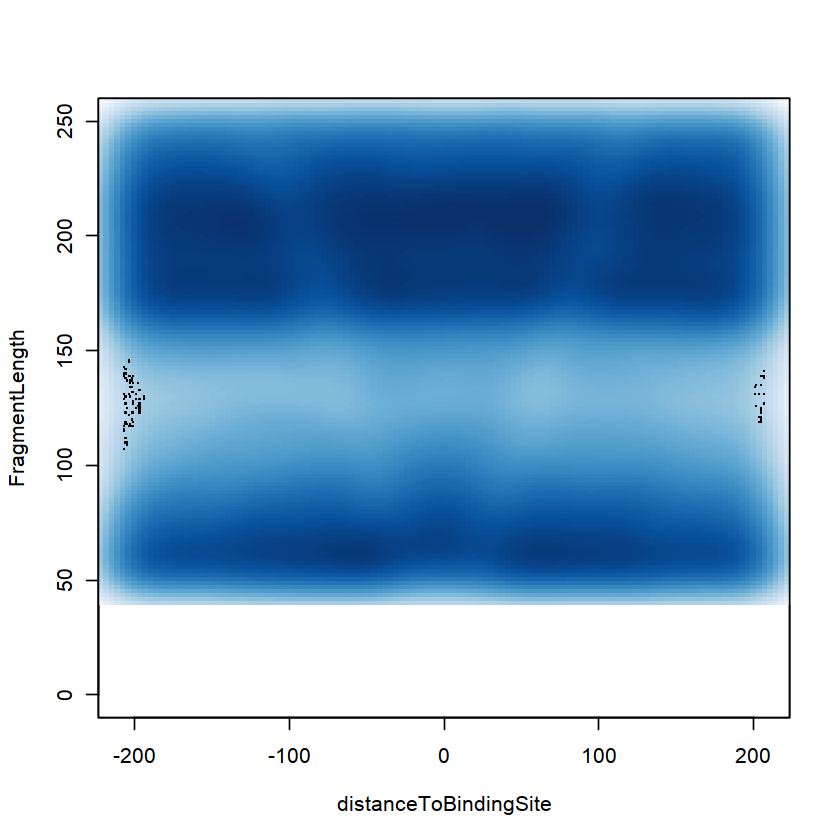

In [53]:
vPlot(c("/srv/scratch/surag/scATAC-reprog/bulk/D0_S1_L001_R1_001.merged.nodup.no_chrM_MT.bam"),
     bindingSites=OCTSOX_p13, genome=BSgenome.Hsapiens.UCSC.hg38, ylim=c(0,250))

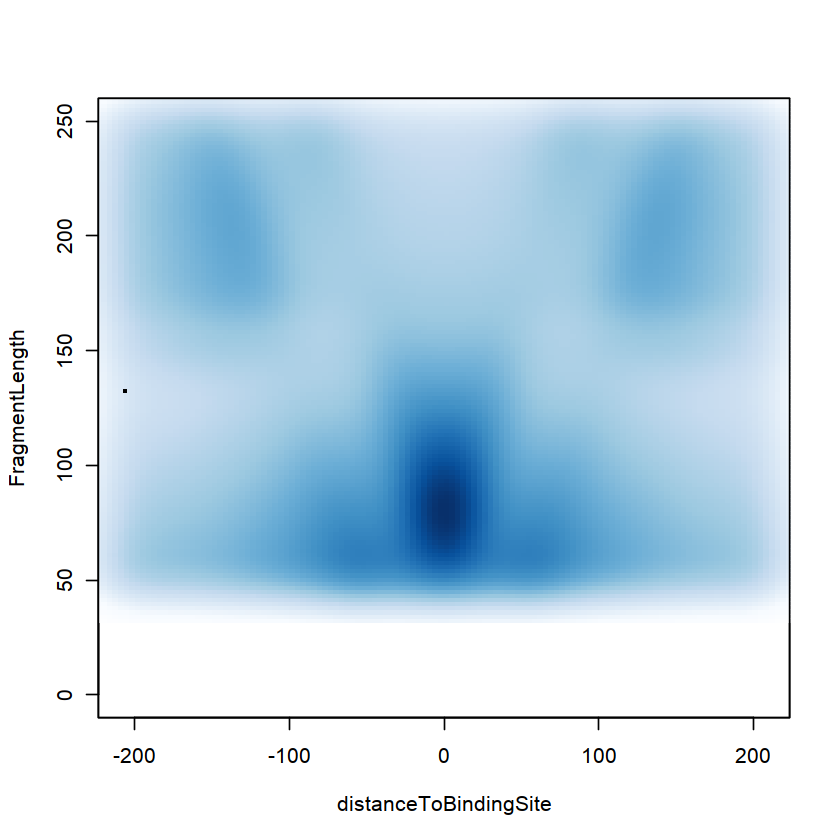

In [7]:
vPlot(c("/srv/scratch/surag/scATAC-reprog/bulk/D0_S1_L001_R1_001.merged.bam"),
     bindingSites=CTCF_hits, genome=BSgenome.Hsapiens.UCSC.hg38, ylim=c(0,250))

In [14]:
get_matrix_from_bigwig <- function(bigwig_path, peak_set) {
    # ensure peak set has fixed width
    stopifnot(length(unique(width(peak_set)))==1)
    
    as.matrix(import(bigwig_path, 
      which=peak_set, as="NumericList"))
}

GRanges object with 3038 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1       840140-840154      *
     [2]     chr1     1801922-1801936      *
     [3]     chr1     2118927-2118941      *
     [4]     chr1     2119077-2119091      *
     [5]     chr1     2119099-2119113      *
     ...      ...                 ...    ...
  [3034]     chr1 247318925-247318939      *
  [3035]     chr1 248799329-248799343      *
  [3036]     chr1 248845444-248845458      *
  [3037]     chr1 248845519-248845533      *
  [3038]     chr1 248893721-248893735      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [63]:
cur_regs

GRanges object with 600 ranges and 0 metadata columns:
        seqnames              ranges strand
           <Rle>           <IRanges>  <Rle>
    [1]     chr1 100040156-100040170      *
    [2]     chr1   51249576-51249590      *
    [3]     chr1 172515399-172515413      *
    [4]     chr1 184735848-184735862      *
    [5]     chr1 101118564-101118578      *
    ...      ...                 ...    ...
  [596]     chr1   35847836-35847850      *
  [597]     chr1   59270825-59270839      *
  [598]     chr1   64367672-64367686      *
  [599]     chr1 169424769-169424783      *
  [600]     chr1 167152101-167152115      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [62]:
cur_regs[cur_regs$V4=="+"]

GRanges object with 0 ranges and 0 metadata columns:
   seqnames    ranges strand
      <Rle> <IRanges>  <Rle>
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [175]:
WIDTH=5000
BW_FILE = "~//mnase_tmp//mnase_cuts.bw"

[1] 10000

In [176]:
cur_regs = OCTSOX_p8[seqnames(OCTSOX_p8)=="chr1"]
p8_mnase = get_matrix_from_bigwig(BW_FILE,
                                    resize(cur_regs,  
                                           width = WIDTH, fix = "center"))

cur_seq = as.matrix(getSeq(BSgenome.Hsapiens.UCSC.hg38, resize(cur_regs, width=WIDTH, fix="center")))
p8_gc = (colSums(cur_seq=="G") + colSums(cur_seq=="C"))/nrow(cur_seq)

In [180]:
cur_regs = OCTSOX_p10[seqnames(OCTSOX_p10)=="chr1"]
p10_mnase = get_matrix_from_bigwig(BW_FILE,
                                    resize(cur_regs,  
                                           width = WIDTH, fix = "center"))

cur_seq = as.matrix(getSeq(BSgenome.Hsapiens.UCSC.hg38, resize(cur_regs, width=WIDTH, fix="center")))
p10_gc = (colSums(cur_seq=="G") + colSums(cur_seq=="C"))/nrow(cur_seq)

In [181]:
cur_regs = OCTSOX_p11[seqnames(OCTSOX_p11)=="chr1"]
p11_mnase = get_matrix_from_bigwig(BW_FILE,
                                    resize(cur_regs,  
                                           width = WIDTH, fix = "center"))

cur_seq = as.matrix(getSeq(BSgenome.Hsapiens.UCSC.hg38, resize(cur_regs, width=WIDTH, fix="center")))
p11_gc = (colSums(cur_seq=="G") + colSums(cur_seq=="C"))/nrow(cur_seq)

In [182]:
cur_regs = OCTSOX_p13[seqnames(OCTSOX_p13)=="chr1"]
p13_mnase = get_matrix_from_bigwig(BW_FILE,
                                    resize(cur_regs,  
                                           width = WIDTH, fix = "center"))

cur_seq = as.matrix(getSeq(BSgenome.Hsapiens.UCSC.hg38, resize(cur_regs, width=WIDTH, fix="center")))
p13_gc = (colSums(cur_seq=="G") + colSums(cur_seq=="C"))/nrow(cur_seq)

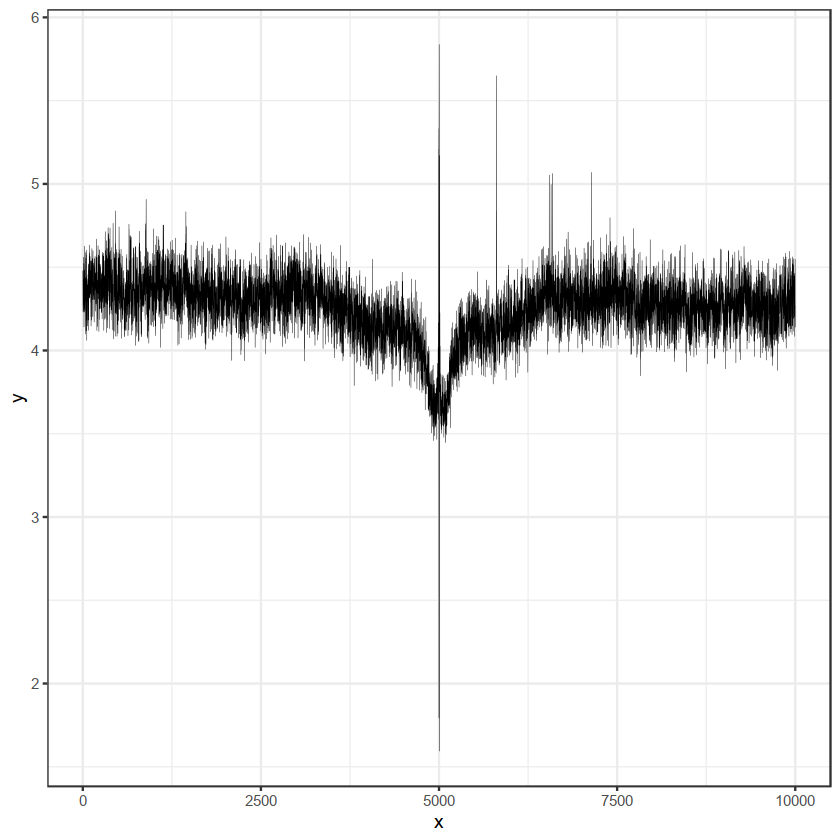

In [155]:
ggplot(data.frame(x=seq(WIDTH), 
                  y=colMeans(p8_mnase))) +
geom_line(aes(x=x,y=y), size=0.1) +
theme_bw()

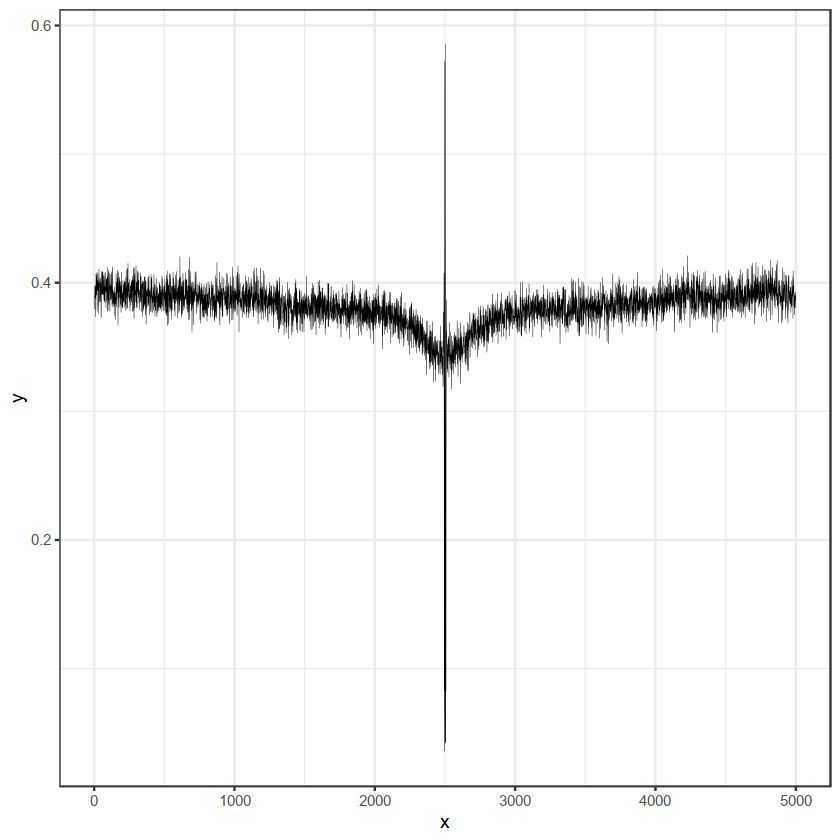

In [179]:
ggplot(data.frame(x=seq(WIDTH), 
                  y=p8_gc)) +
geom_line(aes(x=x,y=y), size=0.1) +
theme_bw()

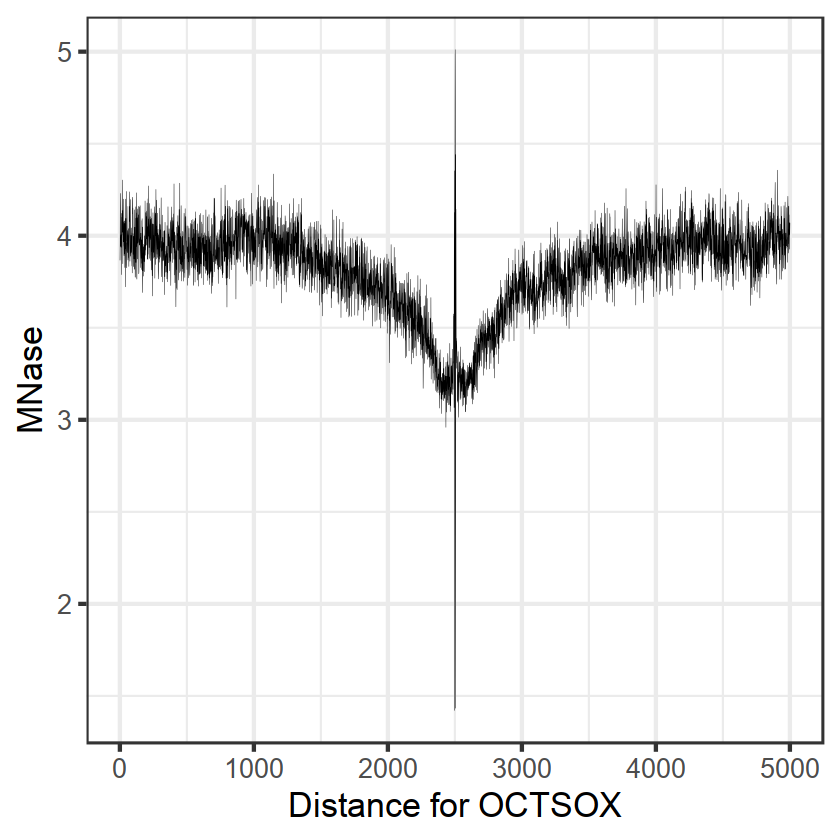

In [208]:
ggplot(data.frame(x=seq(WIDTH), 
                  y=colMeans(p10_mnase))) +
geom_line(aes(x=x,y=y), size=0.1) +
ylab("MNase") +
xlab("Distance for OCTSOX") +
theme_bw(base_size=20)

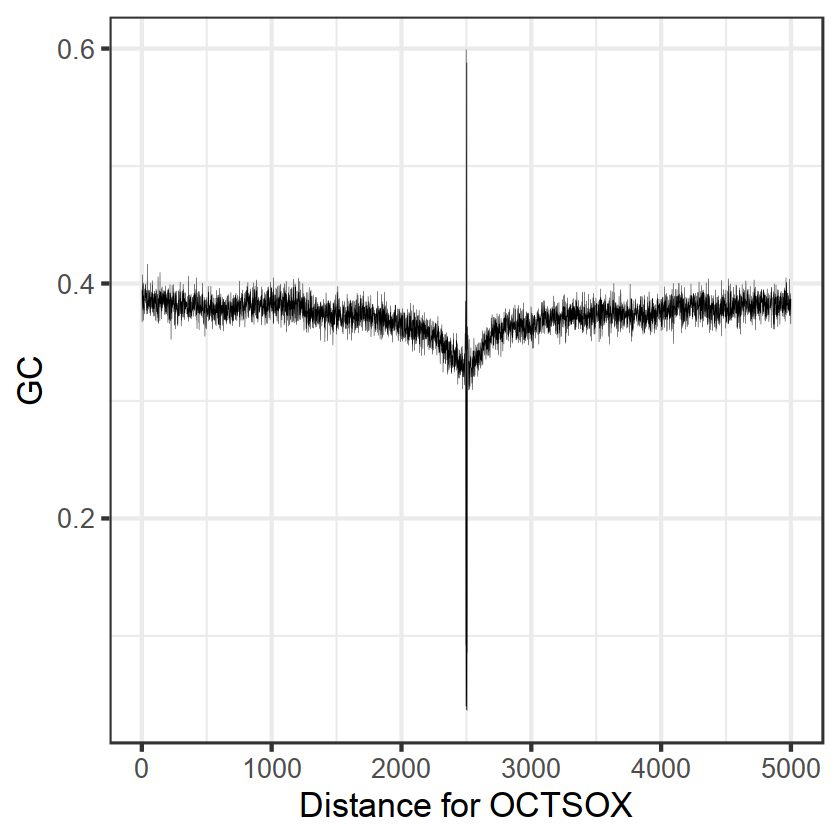

In [211]:
ggplot(data.frame(x=seq(WIDTH), 
                  y=p10_gc)) +
geom_line(aes(x=x,y=y), size=0.1) +
ylab("GC") +
xlab("Distance for OCTSOX") +
theme_bw(base_size=20)

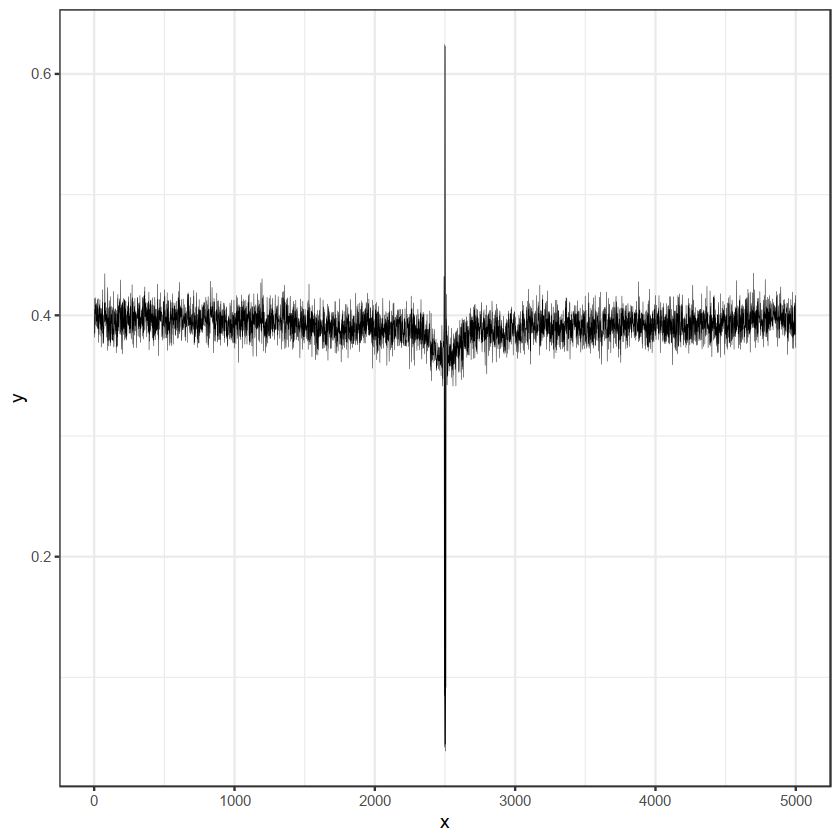

In [184]:
ggplot(data.frame(x=seq(WIDTH), 
                  y=p11_gc)) +
geom_line(aes(x=x,y=y), size=0.1) +
theme_bw()

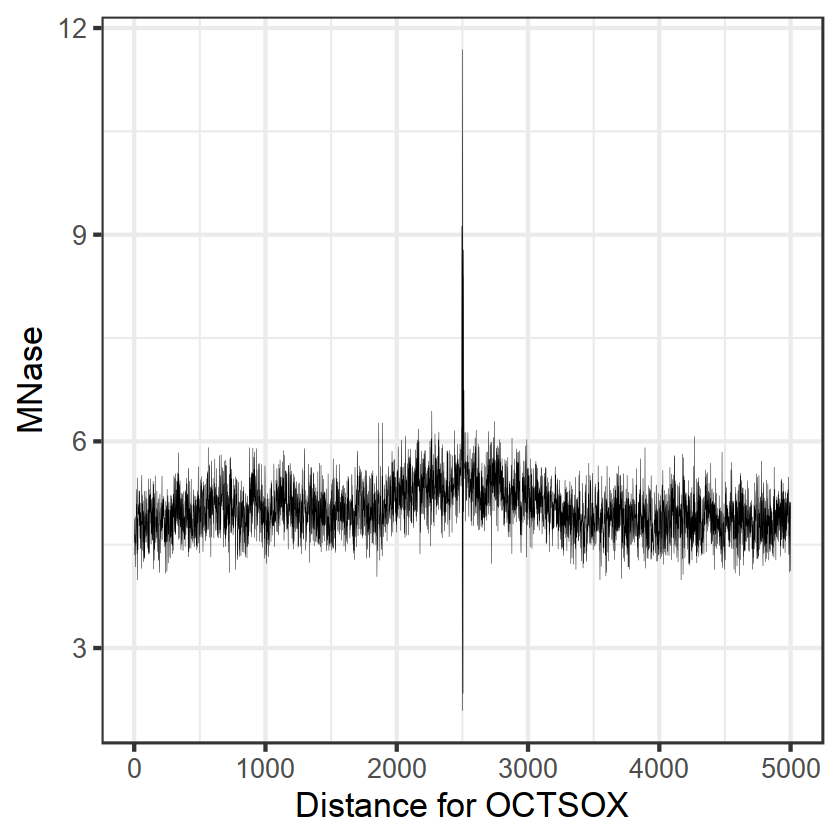

In [209]:
ggplot(data.frame(x=seq(WIDTH), 
                  y=colMeans(p13_mnase))) +
geom_line(aes(x=x,y=y), size=0.1) +
ylab("MNase") +
xlab("Distance for OCTSOX") +
theme_bw(base_size=20)

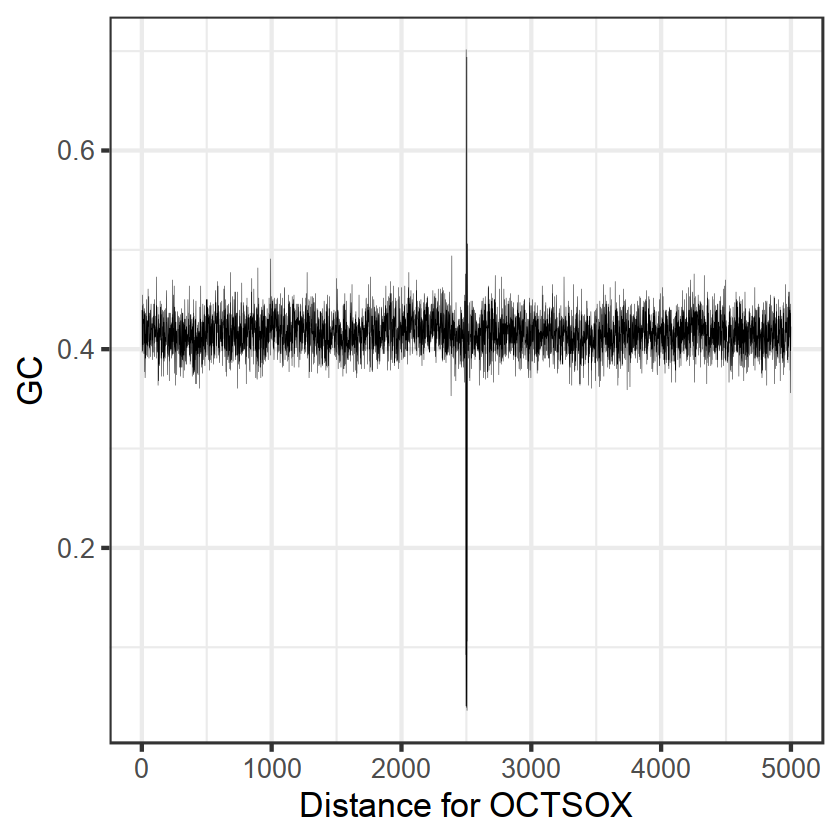

In [210]:
ggplot(data.frame(x=seq(WIDTH), 
                  y=p13_gc)) +
geom_line(aes(x=x,y=y), size=0.1) +
ylab("GC") +
xlab("Distance for OCTSOX") +
theme_bw(base_size=20)

In [ ]:
ctc

In [203]:
cur_regs = read.table("~/mnase_tmp//ctcf.hits")
colnames(cur_regs)[1:3] = c("chr", "start", "end")
cur_regs = GRanges(cur_regs)

ctcf_mnase = get_matrix_from_bigwig("~/mnase_tmp//mnase_cuts_shifted.bw",
                                    resize(# cur_regs,  
                                        cur_regs[rev(order(cur_regs$V5))][1:400],
                                           width = 2000, fix = "center"))

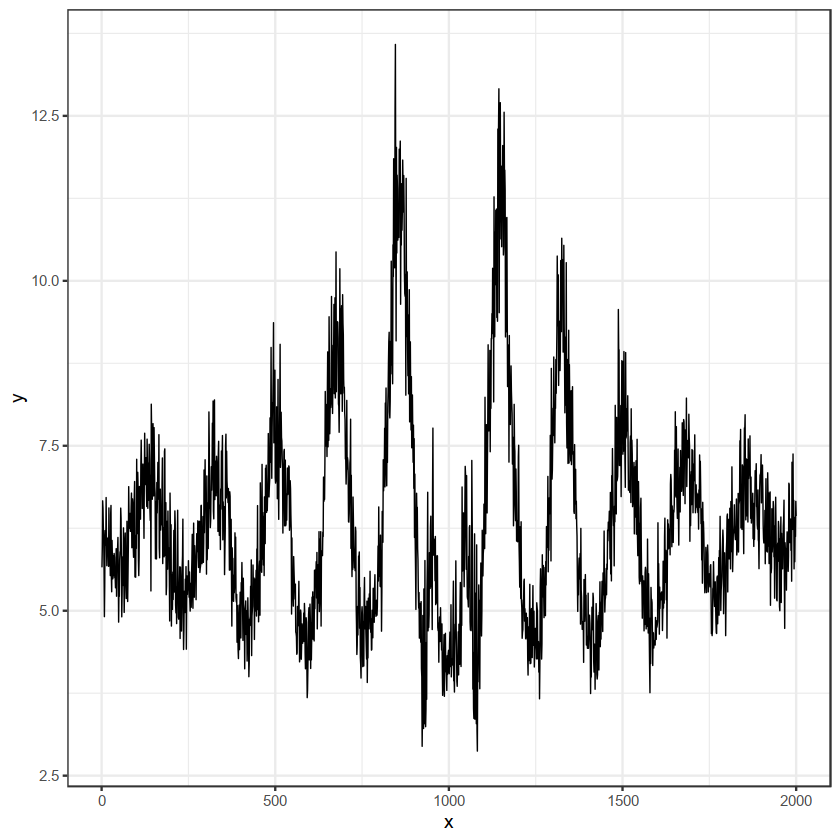

In [204]:
ggplot(data.frame(x=seq(2000), 
                  y=colMeans(ctcf_mnase))) +
geom_line(aes(x=x,y=y), size=0.3) +
theme_bw()